In [13]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

# QRAM Modifications
Team members: Ashwin Sivakumar, Sushanth B S, Mohammed Farhan C S, Rishi Senthil 
The following project is an attempt to implement the bucket - brigade architecture and modify the circuit using dynamic circuits. 


## List of gates used:
1. Pauli X Gate
2. Hadamard Gate
3. CNOT Gate
4. Toffoli Gate
5. Fredkin/CSWAP Gate

### Pauli X Gate: 
It is the equivalent of NOT gate in conventional digital systems. 

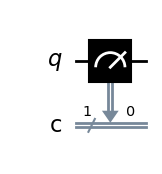

In [16]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw()

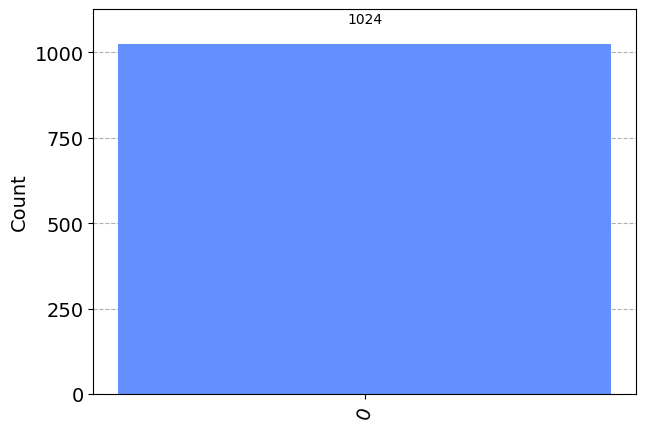

In [17]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

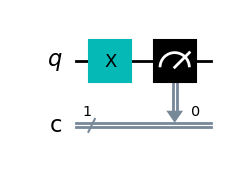

In [19]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
qc.draw()

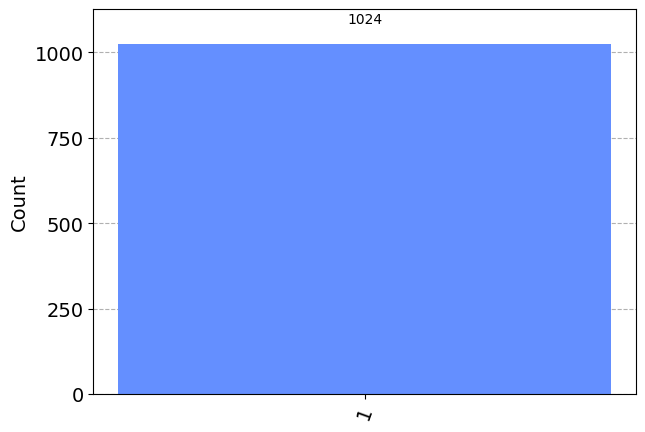

In [20]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Hadamard Gate
In short terms, it splits the probability of measuring a qubit for either 0 or 1 by 50%. In short terms, it splits the probability of measuring a qubit for either 0 or 1 by 50% (Approximately). It puts the qubit in a superposition state which can be both 0 and 1 at the same time, which on measuring will collapse into either 0 or 1. 

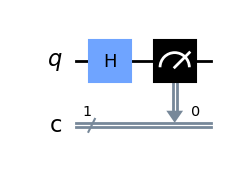

In [21]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw()

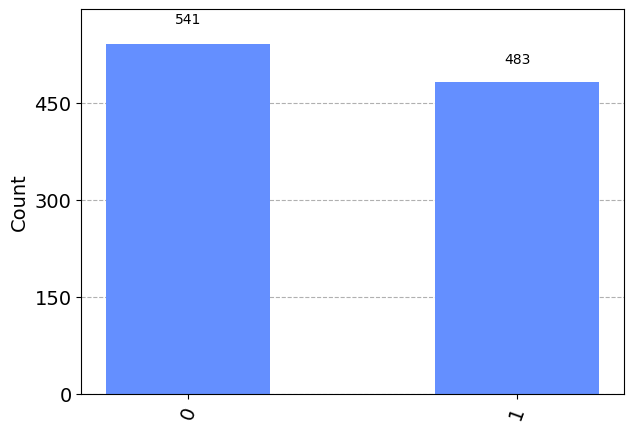

In [27]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### CNOT Gate
This gate is equivalent to the XOR gate in conventional digital systems. It consists of two qubits, the control qubit and the target qubit where the result is measured. 

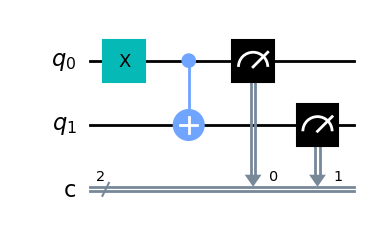

In [62]:
qc = QuantumCircuit(2,2)
qc.x(0)
#qc.x(1)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

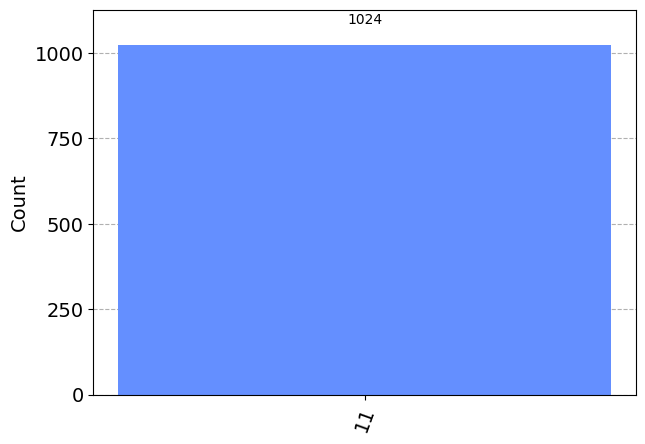

In [63]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Toffoli Gate
This gate is equivalent to the AND gate in conventional digital systems. It consists of two control qubits and one target qubit. 

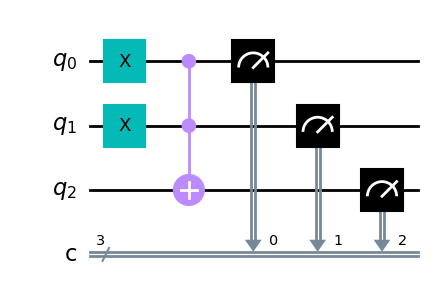

In [58]:
qc = QuantumCircuit(3,3)
'''
qc.h(0)
qc.h(1)
qc.h(2)
'''
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

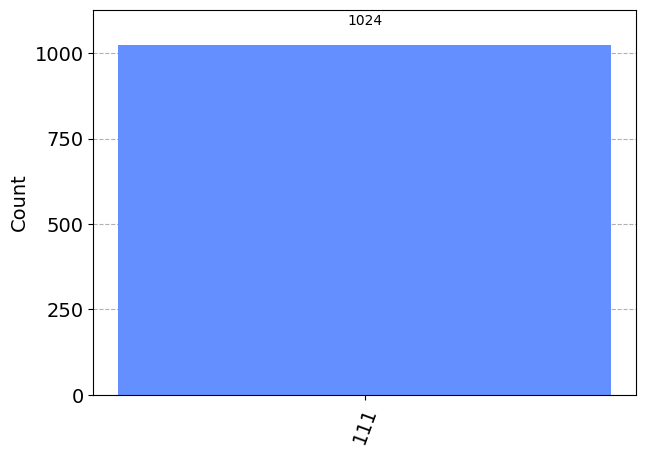

In [59]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Fredkin/CSWAP gate
This gate consists of 3 input lines, 3 output lines where the first output line will be replica of first input line and the last two output lines gets swap if the first input line is 1. This gate is also knowns as controlled swap gate

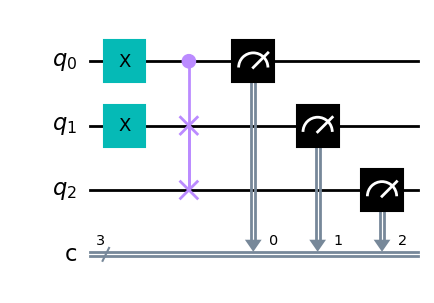

In [68]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.cswap(0,1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

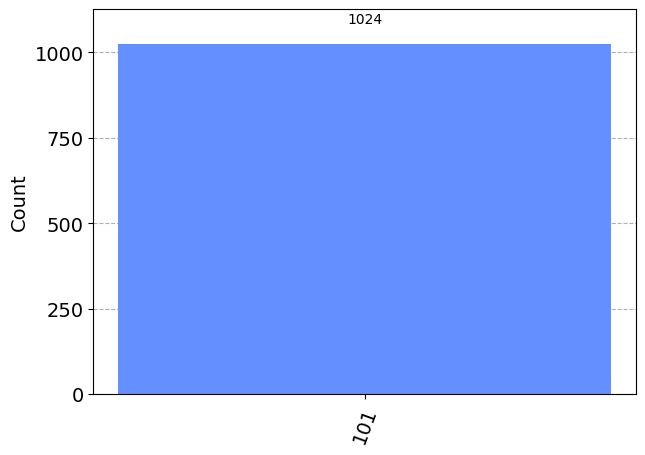

In [69]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

## Bucket Brigade Architecture:
- For n inputs there will be 2^𝑛 memory cells and equal amount of routing nodes
- “Compared to a classical RAM, the advantage provided by bucket-brigade QRAM is that for n address lines the classical RAM requires O(2^n) transistor activations for accessing data in a single address, while the QRAM takes only O(n) quantum switch activations. Furthermore, at a comparable classical cost of O(2^n) quantum switch activations, the QRAM can read data from all the addresses”

### Read Operation

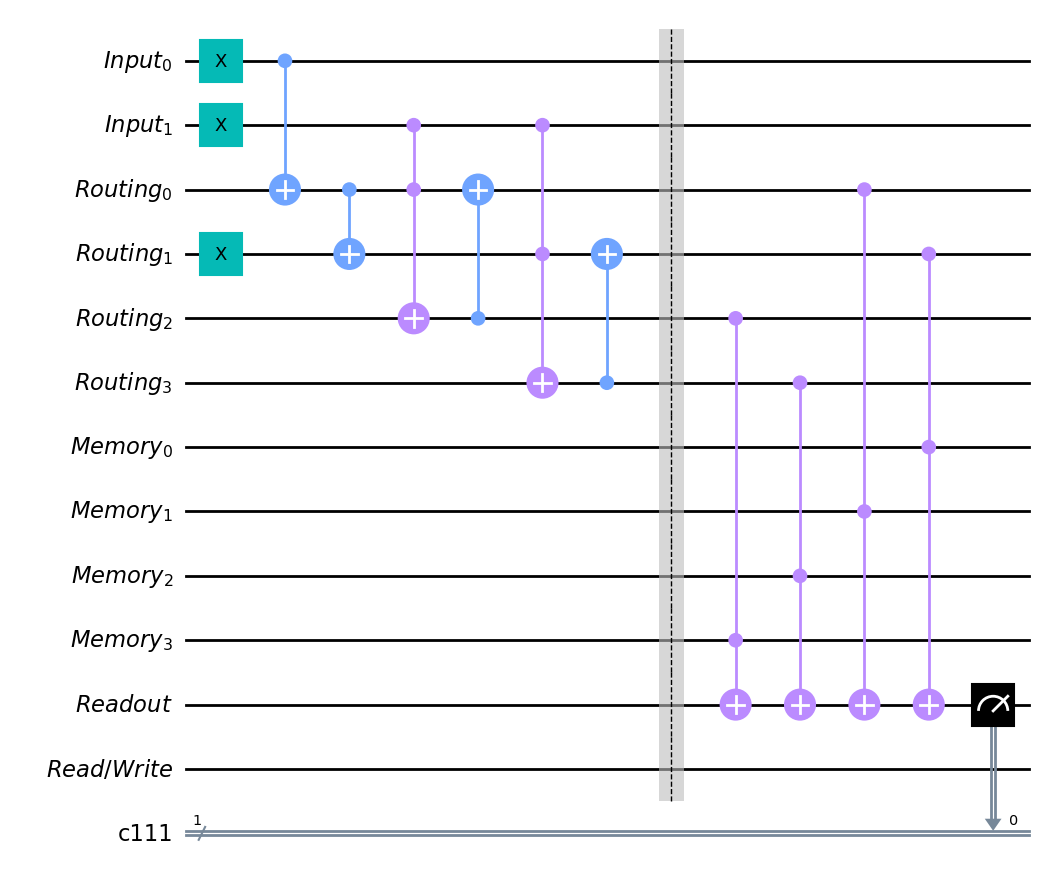

In [323]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(1)
qcr = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcr.x(inp[0])
qcr.x(inp[1])
#qc.i(mem[1:4])
'''
qc.cswap(inp[0],mem[0],mem[2])
qc.cswap(inp[1],mem[0],mem[1])
qc.cswap(inp[1],mem[2],mem[3])
'''
### Routing nodes ####

qcr.cx(inp[0],r[0])
qcr.x(r[1])
qcr.cx(r[0],r[1])

qcr.ccx(inp[1],r[0],r[2])
qcr.cx(r[2],r[0])

qcr.ccx(inp[1],r[1],r[3])
qcr.cx(r[3],r[1])

qcr.barrier()

### Read State ###
qcr.ccx(r[2],mem[3],ro[0])
qcr.ccx(r[3],mem[2],ro[0])
qcr.ccx(r[0],mem[1],ro[0])
qcr.ccx(r[1],mem[0],ro[0])
qcr.measure(ro,cr)

qcr.draw(output='mpl', filename='QRAMRead.png')

In [324]:
qcr.depth()

11

### Write Operation

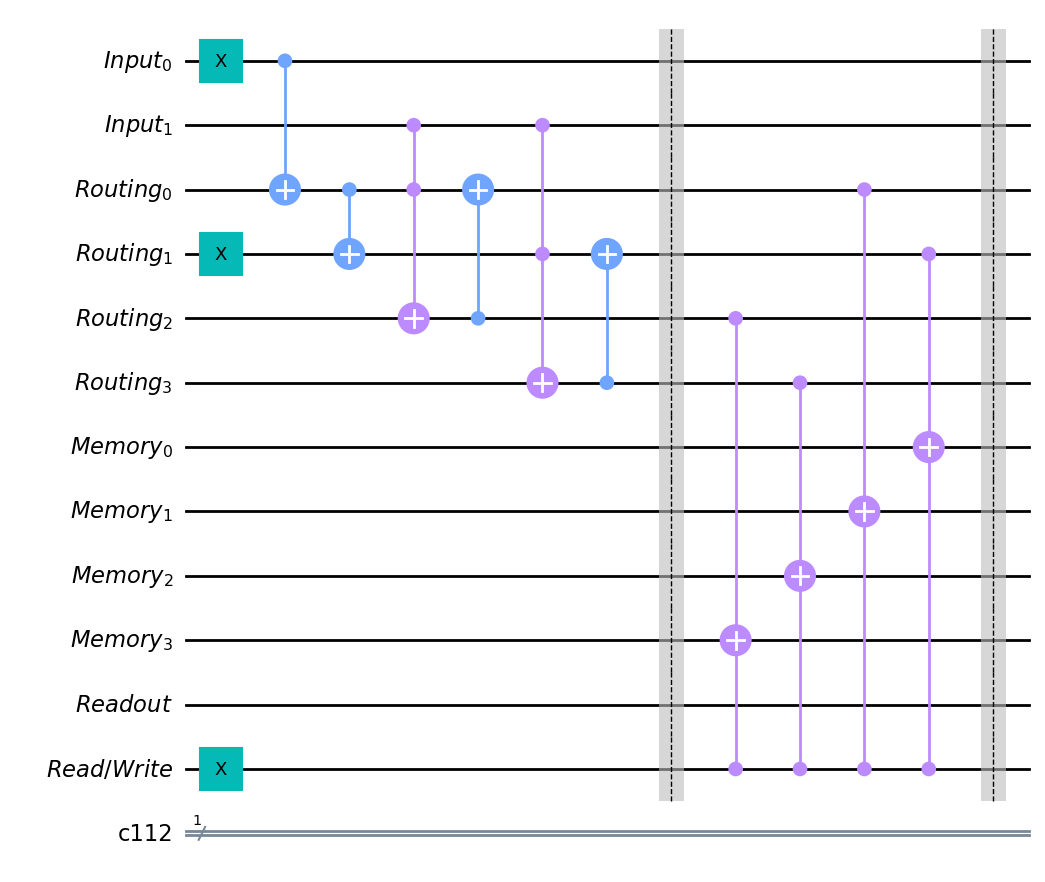

In [325]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(1)
qcw = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcw.x(inp[0])
#qc.i(mem[1:4])
'''
qc.cswap(inp[0],mem[0],mem[2])
qc.cswap(inp[1],mem[0],mem[1])
qc.cswap(inp[1],mem[2],mem[3])
'''
qcw.x(rdwr[0])
### Routing nodes ####

qcw.cx(inp[0],r[0])
qcw.x(r[1])
qcw.cx(r[0],r[1])

qcw.ccx(inp[1],r[0],r[2])
qcw.cx(r[2],r[0])

qcw.ccx(inp[1],r[1],r[3])
qcw.cx(r[3],r[1])

qcw.barrier()

### Write State ###
qcw.ccx(rdwr[0],r[2],mem[3])
qcw.ccx(rdwr[0],r[3],mem[2])
qcw.ccx(rdwr[0],r[0],mem[1])
qcw.ccx(rdwr[0],r[1],mem[0])
qcw.barrier()
#qcw.measure(ro,cr)

qcw.draw(output='mpl', filename='QRAMWrite.png')

In [326]:
qcw.depth()

10

### Combined read and write operations

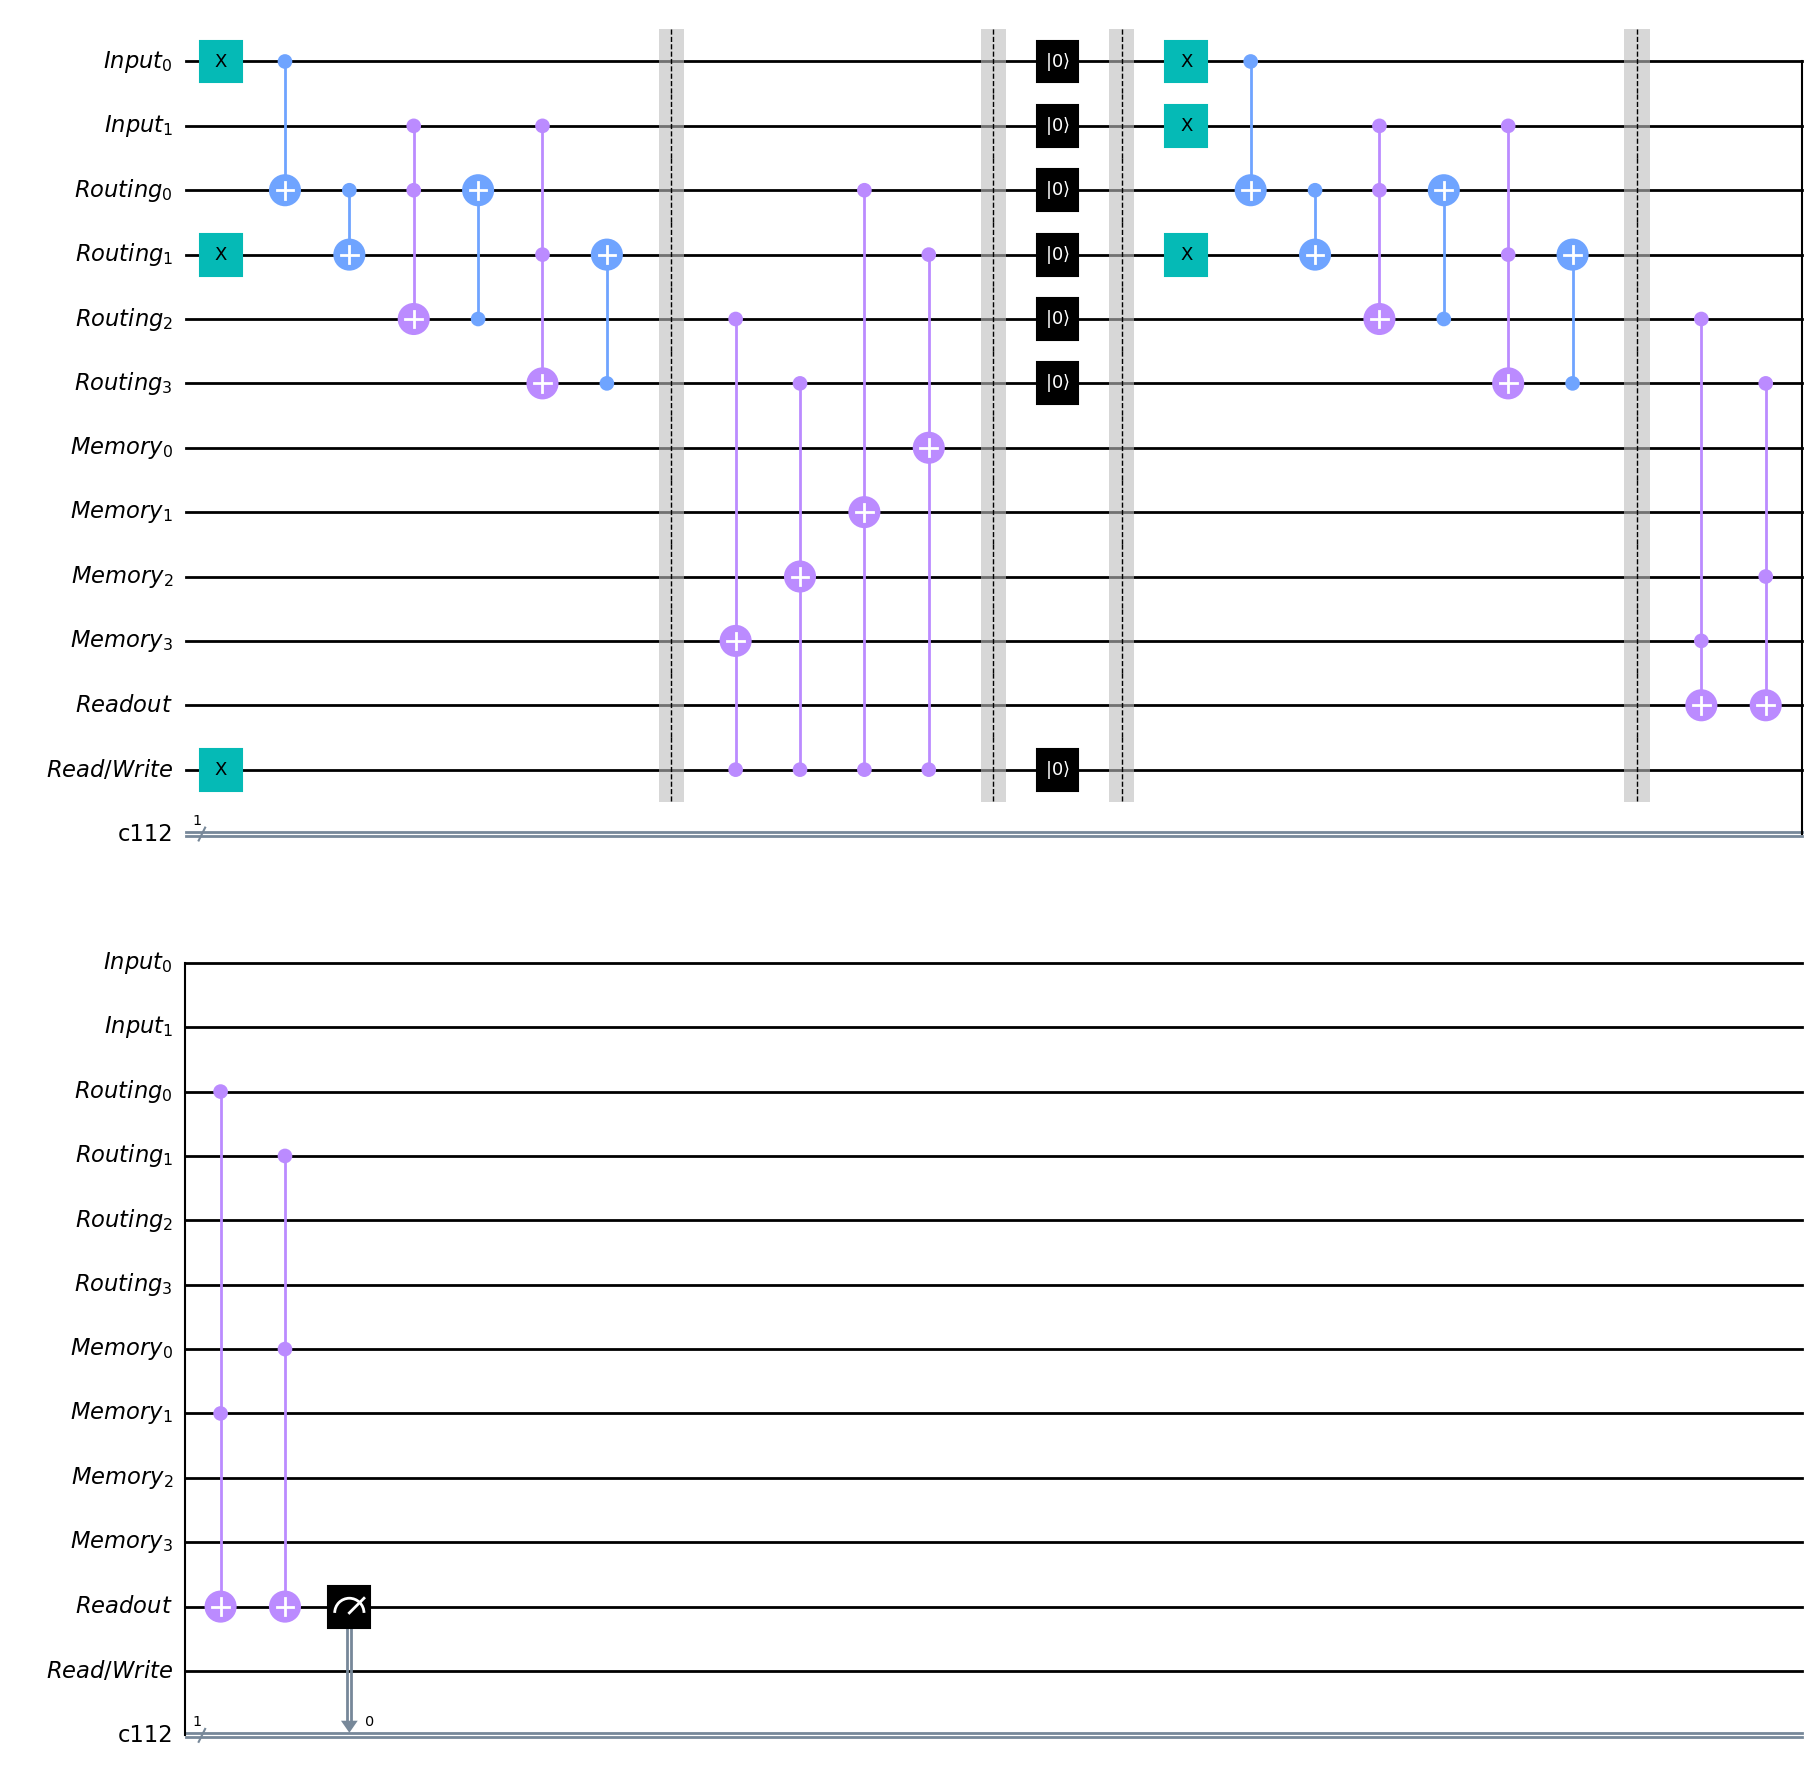

In [327]:
res = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
res.reset(inp)
res.reset(rdwr)
res.reset(r)
#res.reset(ro)
res.barrier()
res.draw()
qc  = qcw.compose(res)
qc = qc.compose(qcr)
qc.draw(output='mpl', filename='QRAMCombined.png')

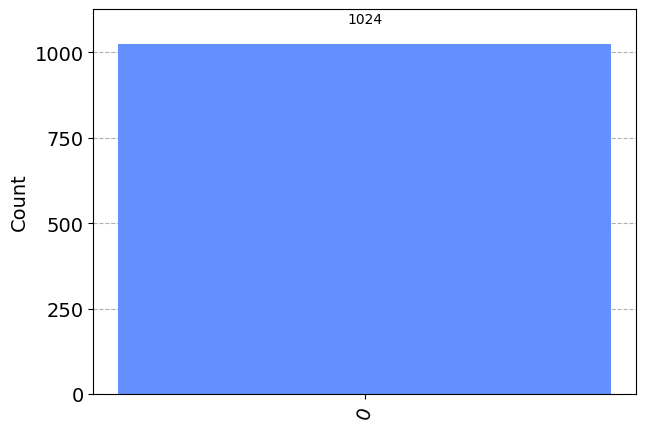

In [328]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [329]:
qc.depth()

22

# Objectives for Modification: 
- To reduce circuit depth and optimize quantum cost.
- Reduce number of gates. 
## Novel Approaches: 
1. Replace CNOT and Toffoli gates with Fredkin gates in the routing nodes. 
2. Apply dynamic quantum circuits to read/write qubit and respective memory cells. 
3. Attempt to further eliminate routing nodes in the quantum ram using dynamic circuit functions.  


## Approach 1:
Routing nodes ultimately is a decoder. We create a 2:4 CSWAP decoder and replace with the current routing nodes. 

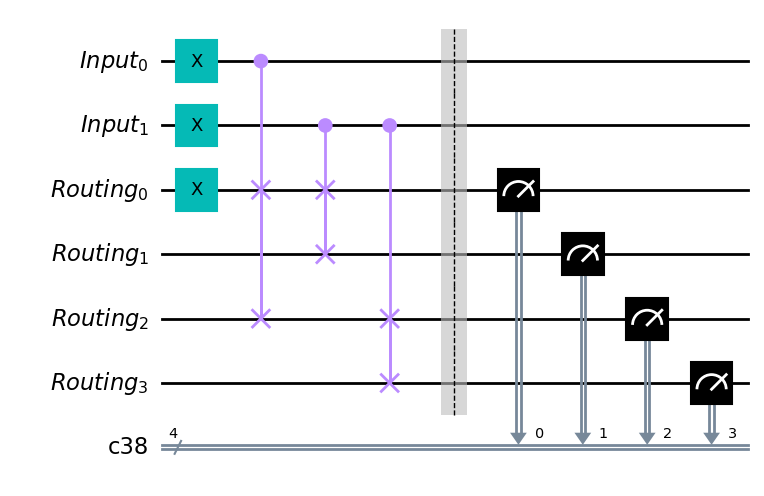

In [148]:
inp = QuantumRegister(2,'Input')
mem = QuantumRegister(4,'Memory')
r = QuantumRegister(4,'Routing')
rdwr = QuantumRegister(1,'Read/Write')
copy = QuantumRegister(2,'Copy')
cr = ClassicalRegister(4)
qc = QuantumCircuit(inp,r,cr)
qc.x(inp[0])
qc.x(inp[1])
qc.x(r[0])
#qc.i(mem[1:4])
qc.cswap(inp[0],r[0],r[2])
qc.cswap(inp[1],r[0],r[1])
qc.cswap(inp[1],r[2],r[3])
qc.barrier()
qc.measure(r,cr)

qc.draw()

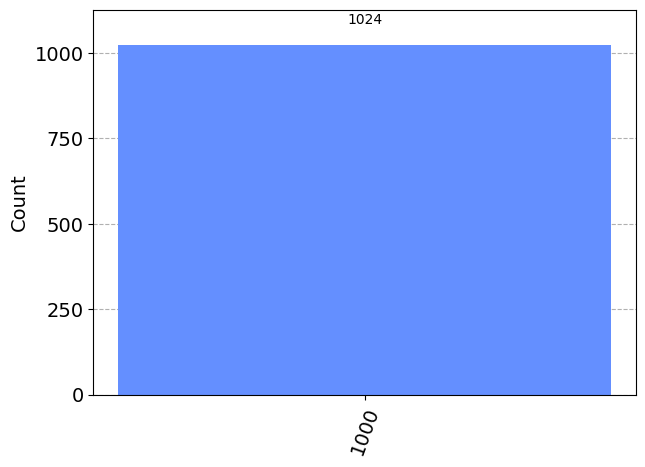

In [159]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Write Operation:

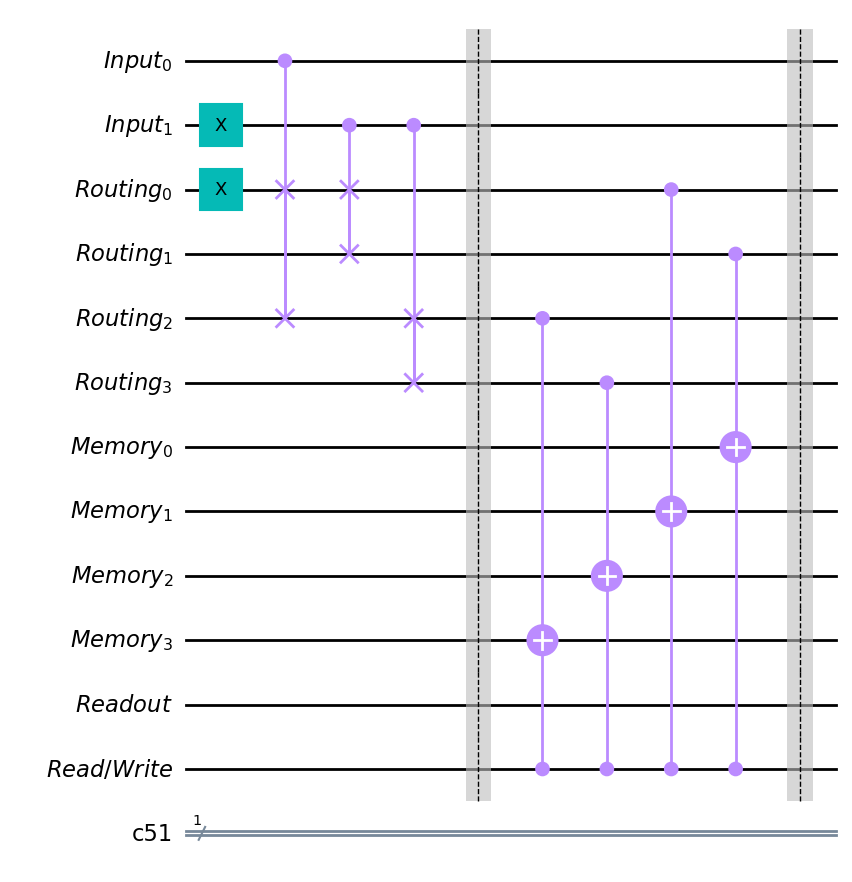

In [169]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(1)
qcw = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
#qcw.x(inp[0])
qcw.x(inp[1])

### Routing nodes ####
qcw.x(r[0])
qcw.cswap(inp[0],r[0],r[2])
qcw.cswap(inp[1],r[0],r[1])
qcw.cswap(inp[1],r[2],r[3])

qcw.barrier()

### Write State ###
qcw.ccx(rdwr[0],r[2],mem[3])
qcw.ccx(rdwr[0],r[3],mem[2])
qcw.ccx(rdwr[0],r[0],mem[1])
qcw.ccx(rdwr[0],r[1],mem[0])
qcw.barrier()
#qcw.measure(ro,cr)

qcw.draw(output='mpl', filename='QRAMWrite.png')

In [170]:
qcw.depth()

8

### Read Operations: 

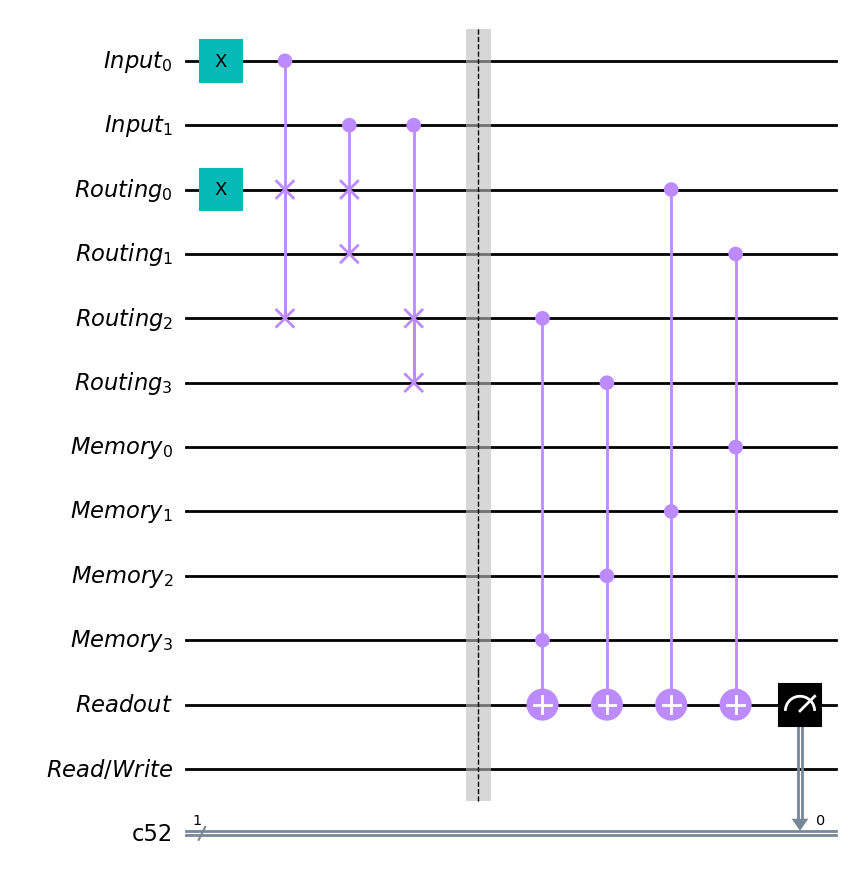

In [171]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(1)
qcr = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcr.x(inp[0])
#qcr.x(inp[1])


### Routing nodes ####
qcr.x(r[0])
qcr.cswap(inp[0],r[0],r[2])
qcr.cswap(inp[1],r[0],r[1])
qcr.cswap(inp[1],r[2],r[3])


qcr.barrier()

### Read State ###
qcr.ccx(r[2],mem[3],ro[0])
qcr.ccx(r[3],mem[2],ro[0])
qcr.ccx(r[0],mem[1],ro[0])
qcr.ccx(r[1],mem[0],ro[0])
qcr.measure(ro,cr)

qcr.draw(output='mpl', filename='QRAMRead.png')

In [172]:
qcr.depth()

9

### Combined operations

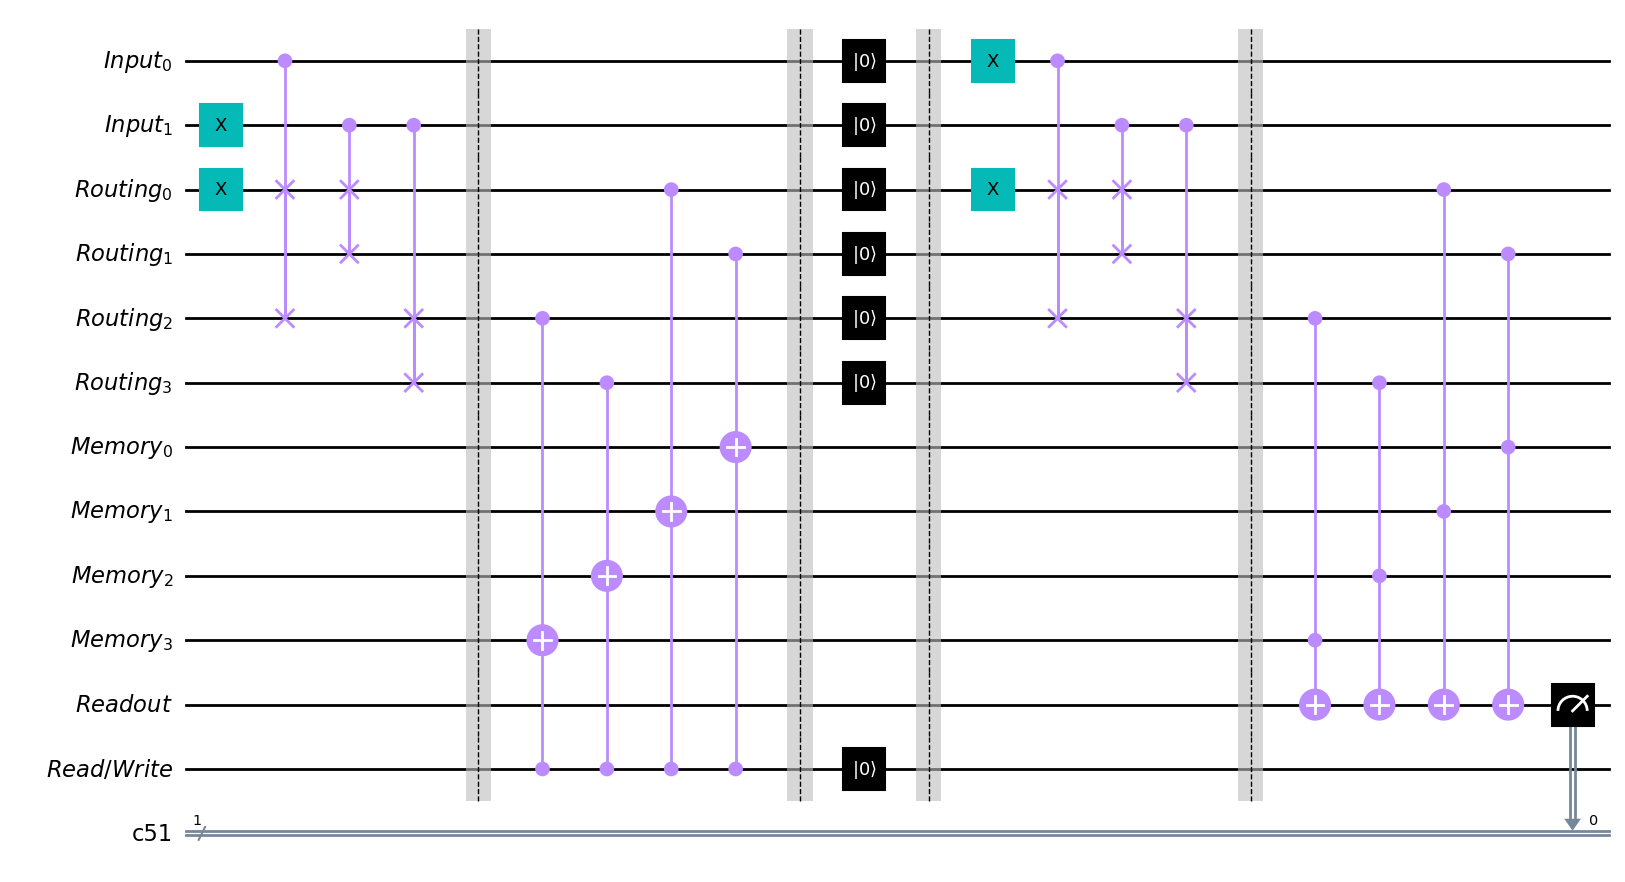

In [173]:
res = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
res.reset(inp)
res.reset(rdwr)
res.reset(r)
#res.reset(ro)
res.barrier()
res.draw()
qc  = qcw.compose(res)
qc = qc.compose(qcr)
qc.draw(output='mpl', filename='QRAMCombinedCSWAP.png')

In [174]:
qc.depth()

18

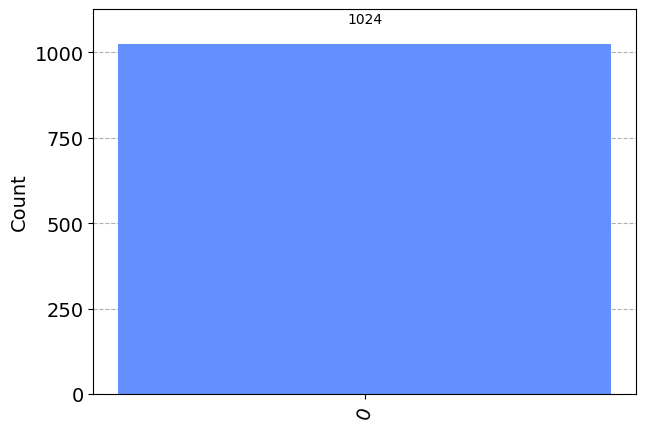

In [175]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

## Approach 2
### Dynamic Circuits:
- “Dynamic circuits, incorporate classical processing within the coherence time of the qubits. This means that dynamic circuits can make use of mid-circuit measurements and perform feed-forward operations, using the values produced by measurements to determine what gates to apply next.” 
- In a mathematical sense and absent experimental constraints, static and dynamic circuits have the same computational power. That is, any problem representable with a dynamic circuit can also be represented as a static one. However, dynamic circuits can assist in overcoming some of the limitations of real hardware. In particular, dynamic circuits offer new opportunities to trade off circuit depth and width, which can be the difference between a circuit which works and one whose output is indistinguishable from noise.

### Write Operation:
Note: Modified CSWAP gates are used for routing nodes

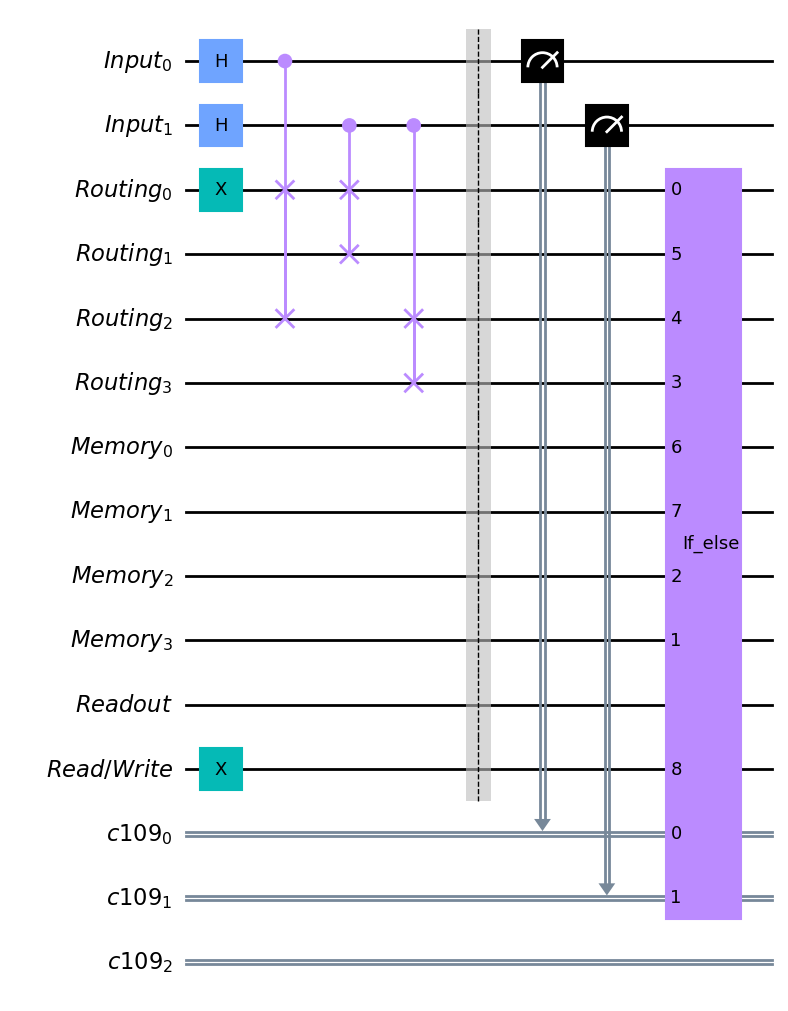

In [305]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(3)
(b0, b1, b2) = cr
qcw = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcw.x(rdwr[0])

##Input Qubits operations
qcw.h(inp[0])
qcw.h(inp[1])


### Routing nodes ####
qcw.x(r[0])
qcw.cswap(inp[0],r[0],r[2])
qcw.cswap(inp[1],r[0],r[1])
qcw.cswap(inp[1],r[2],r[3])


### Write State ###
qcw.barrier()
qcw.measure(inp[0],b0)
qcw.measure(inp[1],b1)

with qcw.if_test((b0, 1)) as else_:
    with qcw.if_test((b1,1)) as else1_:
        qcw.ccx(rdwr[0],r[3],mem[2])
    with else1_:
        qcw.ccx(rdwr[0],r[2],mem[3])
with else_:
    with qcw.if_test((b1,1)) as else2_:
        qcw.ccx(rdwr[0],r[1],mem[0])
    with else2_:
        qcw.ccx(rdwr[0],r[0],mem[1])
    
'''
with qcw.if_test((b0, 0) and (b1,0)) as else_:
    qcw.ccx(rdwr[0],r[2],mem[3])
with qcw.if_test((b0, 0) and (b1,1)) as else_:
    qcw.ccx(rdwr[0],r[3],mem[2])
with qcw.if_test((b0, 1) and (b1,0))as else_:
    qcw.ccx(rdwr[0],r[0],mem[1])
with qcw.if_test((b0, 1) and (b1,1))as else_:
    qcw.ccx(rdwr[0],r[1],mem[0])
with else_:
    pass
'''
#qcw.measure(ro,cr)

qcw.draw(output='mpl', filename='QRAMWrite.png')

In [306]:
qcw.depth()

6

### Read Operation
Note: Modified CSWAP gates are used for routing nodes

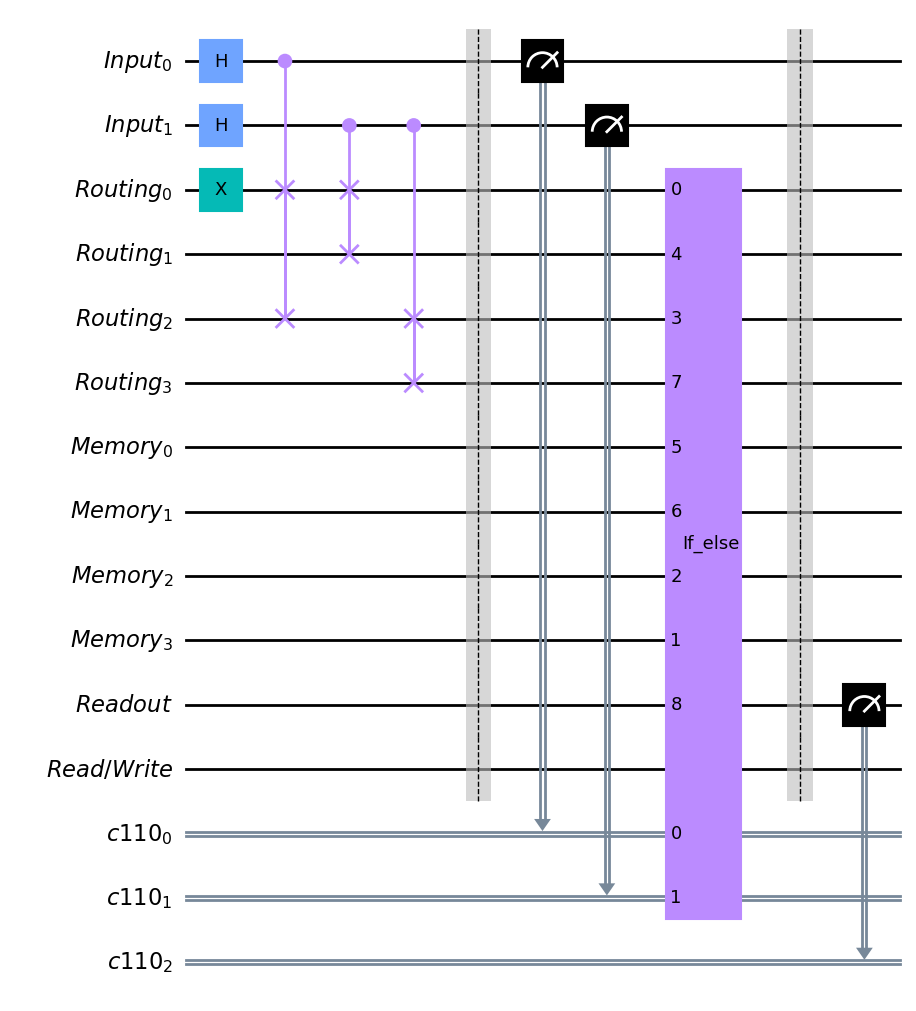

In [307]:
inp = QuantumRegister(2,'Input')
r = QuantumRegister(4,'Routing')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(3)
(b0, b1, b2) = cr
qcr = QuantumCircuit(inp,r,mem,ro,rdwr,cr)

#Input Qubit Operations
qcr.h(inp[0])
qcr.h(inp[1])


### Routing nodes ####
qcr.x(r[0])
qcr.cswap(inp[0],r[0],r[2])
qcr.cswap(inp[1],r[0],r[1])
qcr.cswap(inp[1],r[2],r[3])


qcr.barrier()

### Read State ###
'''
qcr.ccx(r[2],mem[3],ro[0])
qcr.ccx(r[3],mem[2],ro[0])
qcr.ccx(r[0],mem[1],ro[0])
qcr.ccx(r[1],mem[0],ro[0])
'''
qcr.measure(inp[0],b0)
qcr.measure(inp[1],b1)
with qcr.if_test((b0, 1)) as else_:
    with qcr.if_test((b1,1)) as else1_:
        qcr.ccx(r[3],mem[2],ro[0])
    with else1_:
        qcr.ccx(r[2],mem[3],ro[0])
with else_:
    with qcr.if_test((b1,1)) as else2_:
        qcr.ccx(r[1],mem[0],ro[0])
    with else2_:
        qcr.ccx(r[0],mem[1],ro[0])
qcr.barrier()
qcr.measure(ro[0],b2)
qcr.draw(output='mpl', filename='QRAMRead.png')

In [308]:
qcr.depth()

7

### Combined Operation:


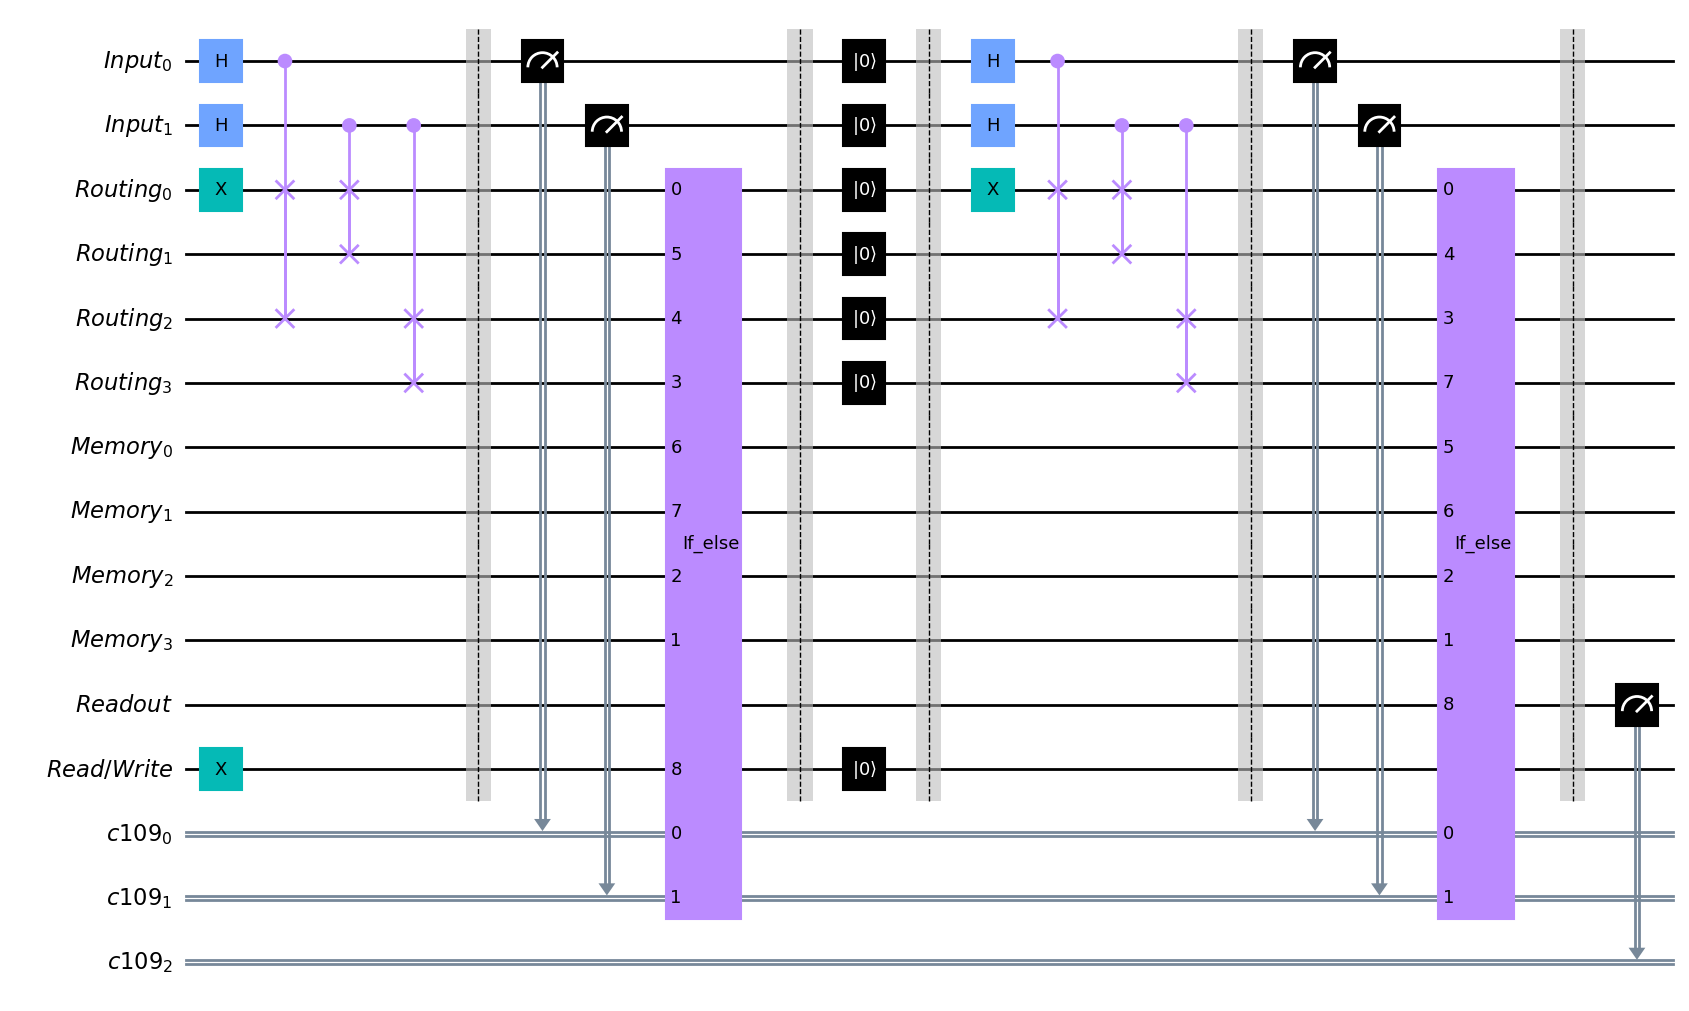

In [309]:
res = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
res.barrier()
res.reset(inp)
res.reset(rdwr)
res.reset(r)
#res.reset(ro)
res.barrier()
res.draw()
qc  = qcw.compose(res)
qc = qc.compose(qcr)
qc.draw(output='mpl', filename='QRAMCombinedDynamic1.png')

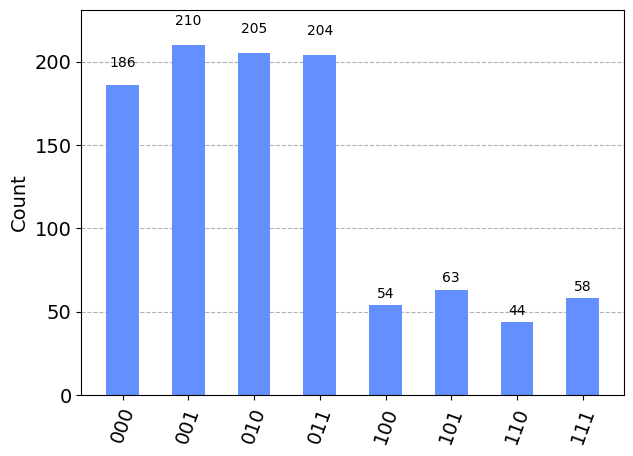

In [314]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [313]:
qc.depth()

14

### Equivalent Circuit

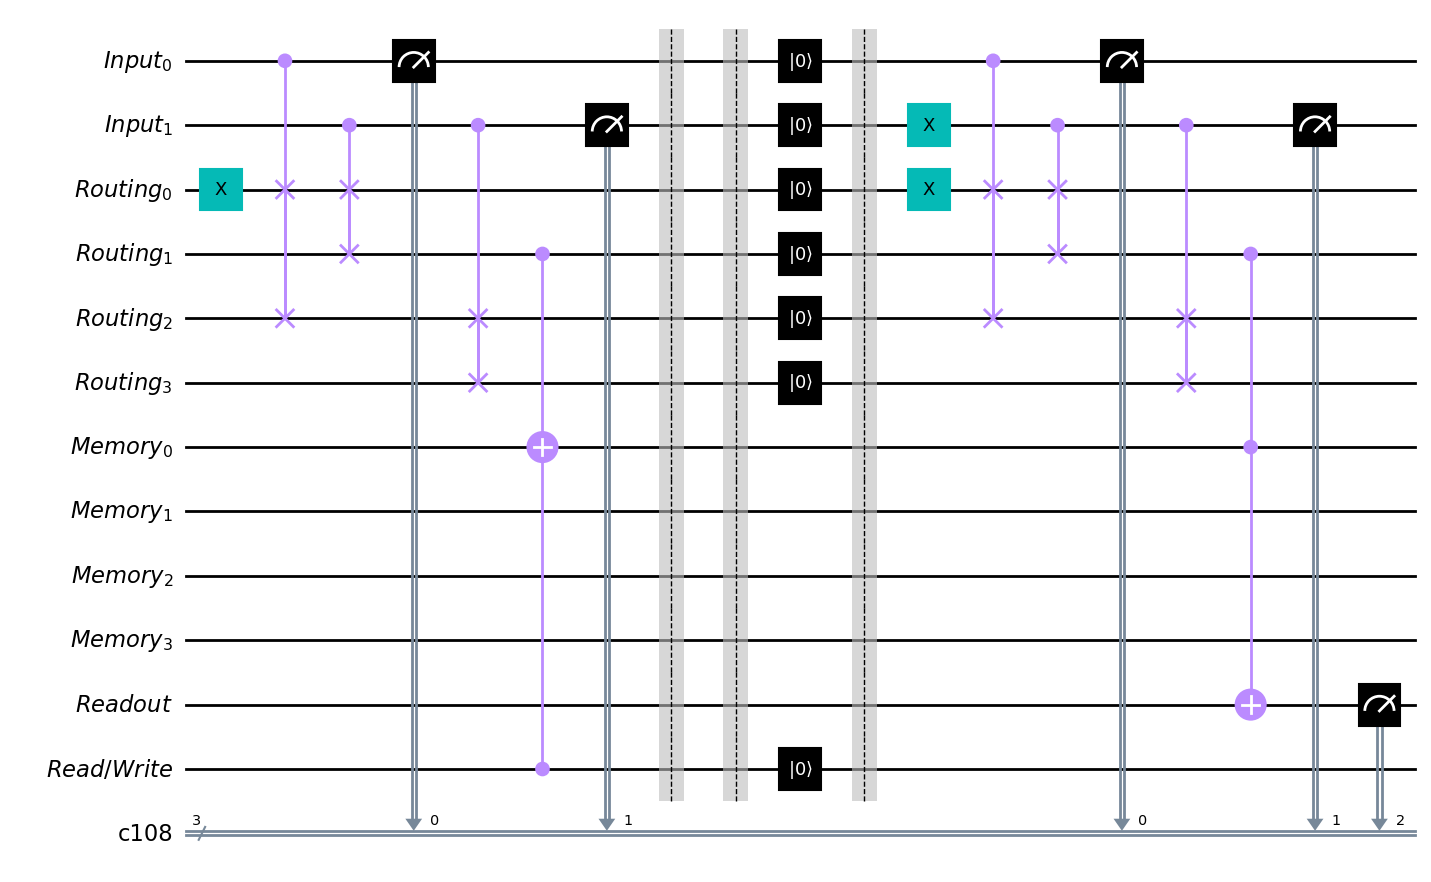

In [298]:
qcr = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcw = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
qcr.x(inp[1])


### Routing nodes ####
qcr.x(r[0])
qcr.cswap(inp[0],r[0],r[2])
qcr.cswap(inp[1],r[0],r[1])
qcr.cswap(inp[1],r[2],r[3])
qcr.measure(inp[0],b0)
qcr.measure(inp[1],b1)
##Reading Node
qcr.ccx(r[1],mem[0],ro[0])
qcr.measure(ro[0],b2)

qcw.x(r[0])
qcw.cswap(inp[0],r[0],r[2])
qcw.cswap(inp[1],r[0],r[1])
qcw.cswap(inp[1],r[2],r[3])
qcw.measure(inp[0],b0)
qcw.measure(inp[1],b1)
## Writing node
qcw.ccx(rdwr[0],r[1],mem[0])
qcw.barrier()

res = QuantumCircuit(inp,r,mem,ro,rdwr,cr)
res.barrier()
res.reset(inp)
res.reset(rdwr)
res.reset(r)
#res.reset(ro)
res.barrier()
qc  = qcw.compose(res)
qc = qc.compose(qcr)
qc.draw(output='mpl', filename='EquivalentDynamic1.png')

## Approach 3:
Objective: To eliminate routing node qubits and conduct the read/write operations using single qubit operations with the help of if_else dynamic circuit operation. 

### Read/Write Operation

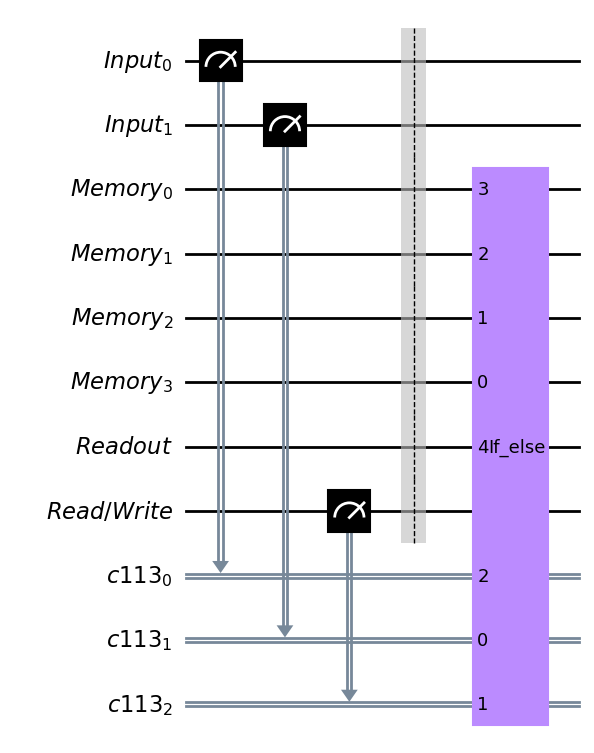

In [330]:
inp = QuantumRegister(2,'Input')
mem = QuantumRegister(4,'Memory')
rdwr = QuantumRegister(1,'Read/Write')
ro = QuantumRegister(1,'Readout')
cr = ClassicalRegister(3)
(b0,b1,b2) = cr
qcwr = QuantumCircuit(inp,mem,ro,rdwr,cr)
#qcw.x(inp[0])
#qcw.x(inp[1])
qcwr.measure(inp[0],b0)
qcwr.measure(inp[1],b1)
qcwr.measure(rdwr[0],b2)
qcwr.barrier()


### Read/Write State ###
with qcwr.if_test((b2, 1)) as else_:
    with qcwr.if_test((b0,1)) as else1_:
        with qcwr.if_test((b1,1)) as elsei1_:
            qcwr.cx(mem[3],ro[0])
            qcwr.measure(ro[0],b2)
            with qcwr.if_test((b1,0)) as elsei2_:
                qcwr.x(mem[3])
            with elsei2_:
                pass
        with elsei1_:
            qcwr.cx(mem[2],ro[0])
            qcwr.measure(ro[0],b2)
            with qcwr.if_test((b1,0)) as elsei2_:
                qcwr.x(mem[2])
            with elsei2_:
                pass
    with else1_:
        with qcwr.if_test((b1,1)) as elsei1_:
            qcwr.cx(mem[1],ro[0])
            qcwr.measure(ro[0],b2)
            with qcwr.if_test((b1,0)) as elsei2_:
                qcwr.x(mem[1])
            with elsei2_:
                pass
        with elsei1_:
            qcwr.cx(mem[0],ro[0])
            qcwr.measure(ro[0],b2)
            with qcwr.if_test((b1,0)) as elsei2_:
                qcwr.x(mem[0])
            with elsei2_:
                pass
with else_:
    with qcwr.if_test((b0,1)) as else1_:
        with qcwr.if_test((b1,1)) as elsei1_:
            qcwr.cx(mem[3],ro[0])
            qcwr.measure(ro[0],b2)
        with elsei1_:
            qcwr.cx(mem[2],ro[0])
            qcwr.measure(ro[0],b2)
    with else1_:
        with qcwr.if_test((b1,1)) as elsei1_:
            qcwr.cx(mem[1],ro[0])
            qcwr.measure(ro[0],b2)
        with elsei1_:
            qcwr.cx(mem[0],ro[0])
            qcwr.measure(ro[0],b2)
    
        

qcwr.draw()

In [331]:
qcwr.depth()

2

### Read + Write operations

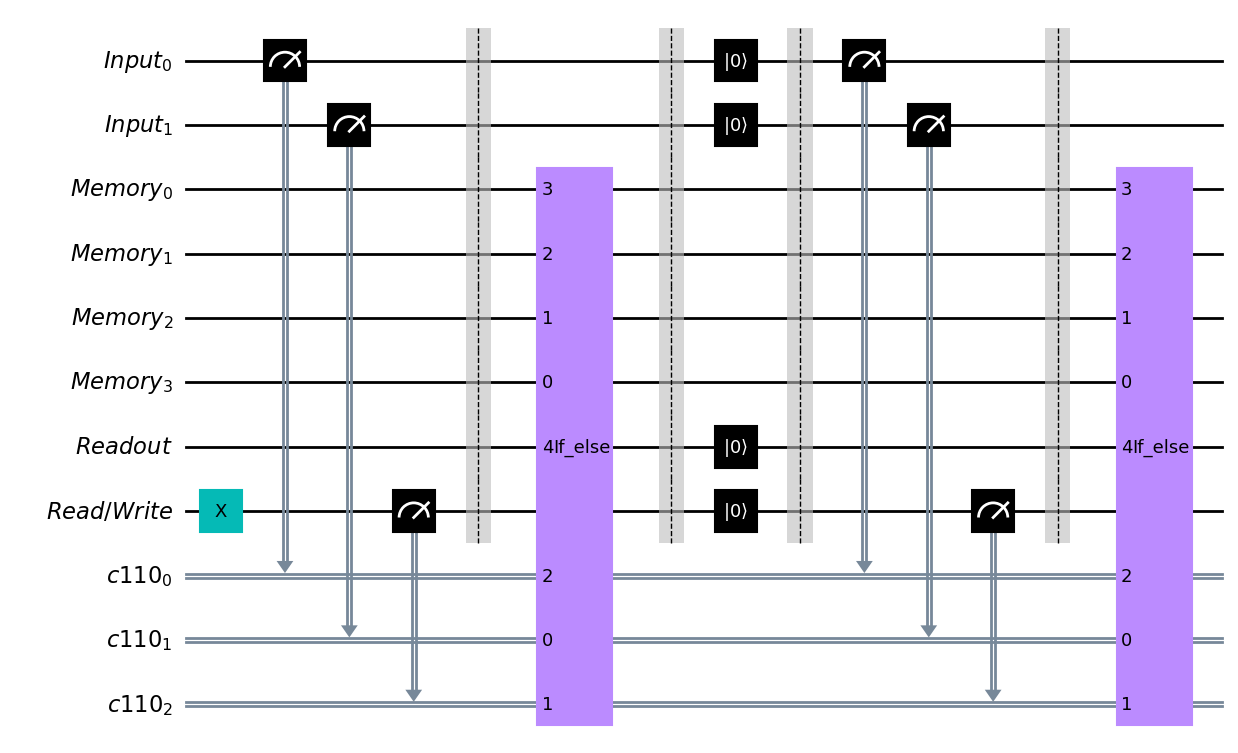

In [315]:
qc =QuantumCircuit(inp,mem,ro,rdwr,cr)
#qc.x(inp[0])
qc.x(rdwr[0])
res = QuantumCircuit(inp,mem,ro,rdwr,cr)
res.barrier()
res.reset(inp)
res.reset(rdwr)
res.reset(ro)
res.barrier()
#res.x(inp[1])
qc = qc.compose(qcwr)
qc  = qc.compose(res)
qc = qc.compose(qcwr)

qc.draw(output='mpl', filename='QRAMCombinedDynamic2.png')

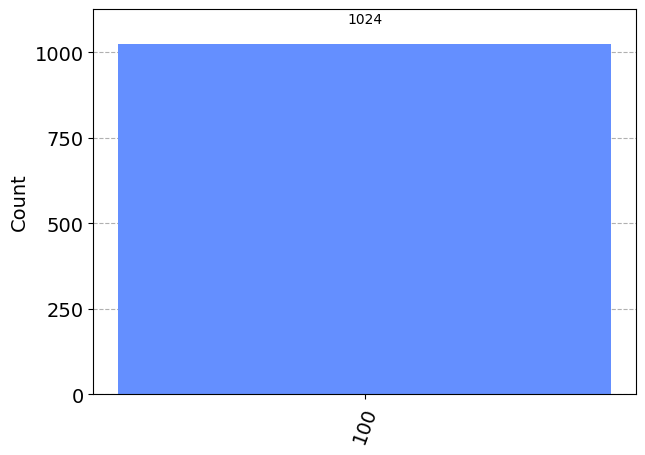

In [316]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [317]:
qc.depth()

6

### Equivalent Circuit: 

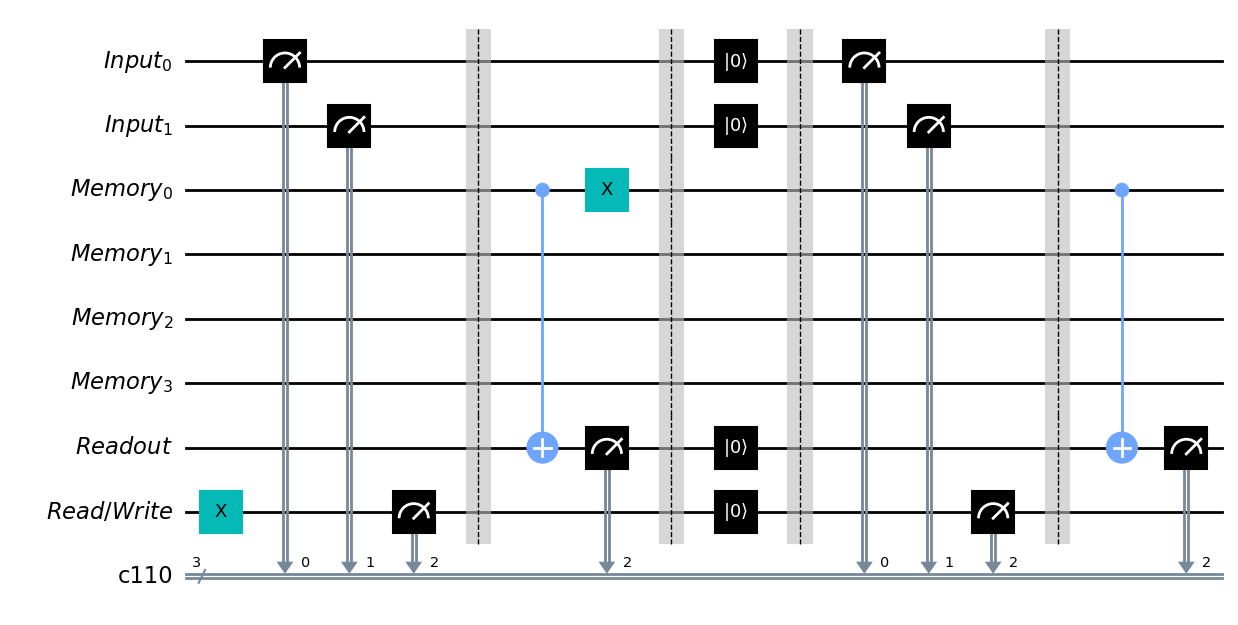

In [318]:
qcwr1 = QuantumCircuit(inp,mem,ro,rdwr,cr)
#qcw.x(inp[0])
#qcw.x(inp[1])
qcwr1.measure(inp[0],b0)
qcwr1.measure(inp[1],b1)
qcwr1.measure(rdwr[0],b2)
qcwr1.barrier()
qcwr1.cx(mem[0],ro[0])
qcwr1.measure(ro[0],b2)
qcwr1.x(mem[0])

qcwr2 = QuantumCircuit(inp,mem,ro,rdwr,cr)
qcwr2.measure(inp[0],b0)
qcwr2.measure(inp[1],b1)
qcwr2.measure(rdwr[0],b2)
qcwr2.barrier()
qcwr2.cx(mem[0],ro[0])
qcwr2.measure(ro[0],b2)

qc =QuantumCircuit(inp,mem,ro,rdwr,cr)
#qc.x(inp[0])
qc.x(rdwr[0])
res = QuantumCircuit(inp,mem,ro,rdwr,cr)
res.barrier()
res.reset(inp)
res.reset(rdwr)
res.reset(ro)
res.barrier()
#res.x(inp[0])
qc = qc.compose(qcwr1)
qc  = qc.compose(res)
qc = qc.compose(qcwr2)
qc.draw(output='mpl', filename='EquivalentDynamic2.png')